In [ ]:
import sys
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, auc, roc_curve,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, learning_curve, cross_validate, train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import plotly.express as px

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle_api/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

 62% 4.00M/6.47M [00:00<00:00, 6.10MB/s]
100% 6.47M/6.47M [00:01<00:00, 6.69MB/s]


In [ ]:
! unzip health-insurance-cross-sell-prediction.zip

Archive:  health-insurance-cross-sell-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
data=pd.read_csv('/content/train.csv')
data.head(2)
test_df=pd.read_csv('/content/train.csv')
check_df=pd.read_csv('/content/test.csv')

#**EDA-Exploratory data analysis**

#**Print the first and last 3 rows of columns**

In [ ]:
data.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [ ]:
data.tail(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


#**Check the column datatypes**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


*   From the above dataset information,There are 14 columns, 10 columns are integer and float types and 4 columns are object types.

#**Understanding statistical data summaries**

In [ ]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,381109.0,NaN,NaN,NaN,190555.0,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Gender,381109,2,Male,206089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,381109.0,NaN,NaN,NaN,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,NaN,NaN,NaN,0.997869,0.04611,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,NaN,NaN,NaN,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,NaN,NaN,NaN,0.45821,0.498251,0.0,0.0,0.0,1.0,1.0
Vehicle_Age,381109,3,1-2 Year,200316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,381109,2,Yes,192413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,381109.0,NaN,NaN,NaN,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,NaN,NaN,NaN,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0


#**Checking for missing values in the dataset**

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64




<Axes: >

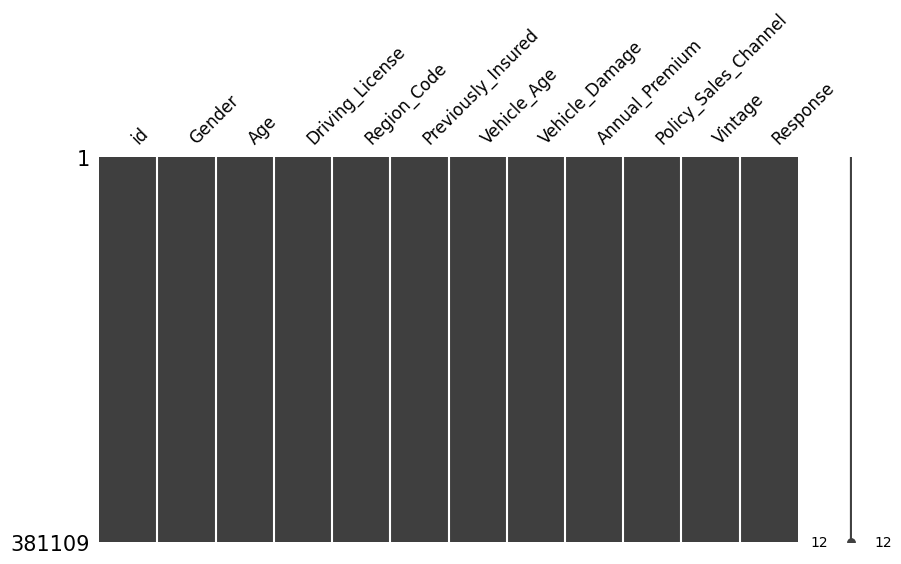

In [ ]:
print(data.isnull().sum())
print('\n')
msno.matrix(data,figsize=(10,5), fontsize=12)

*   There are no missing values in the dataset


#**Identifying and printing duplicate values**

In [ ]:
duplicates =len(data[data.duplicated()])
print(duplicates)

0



*   there were no duplicate values found in the dataset


#**Response**

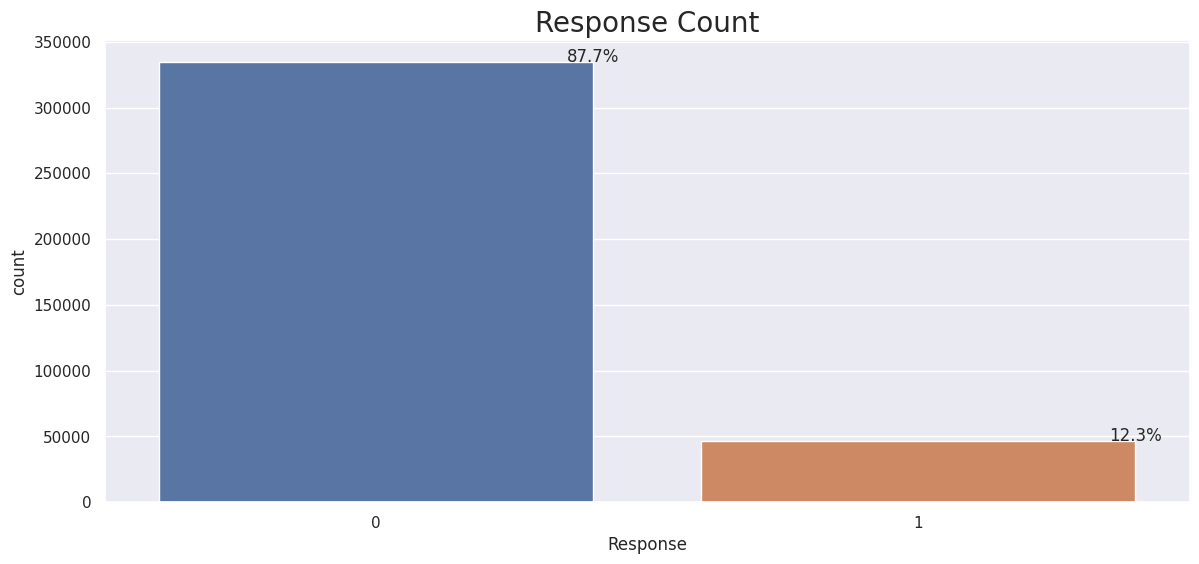

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
total = float(len(data))
ax = sns.countplot(x='Response', data=data)
plt.title('Response Count', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

*   Data are not balanced, 87.7% percent peopel are not interest and 12.3 percent people are interest.


#**Gender variable**

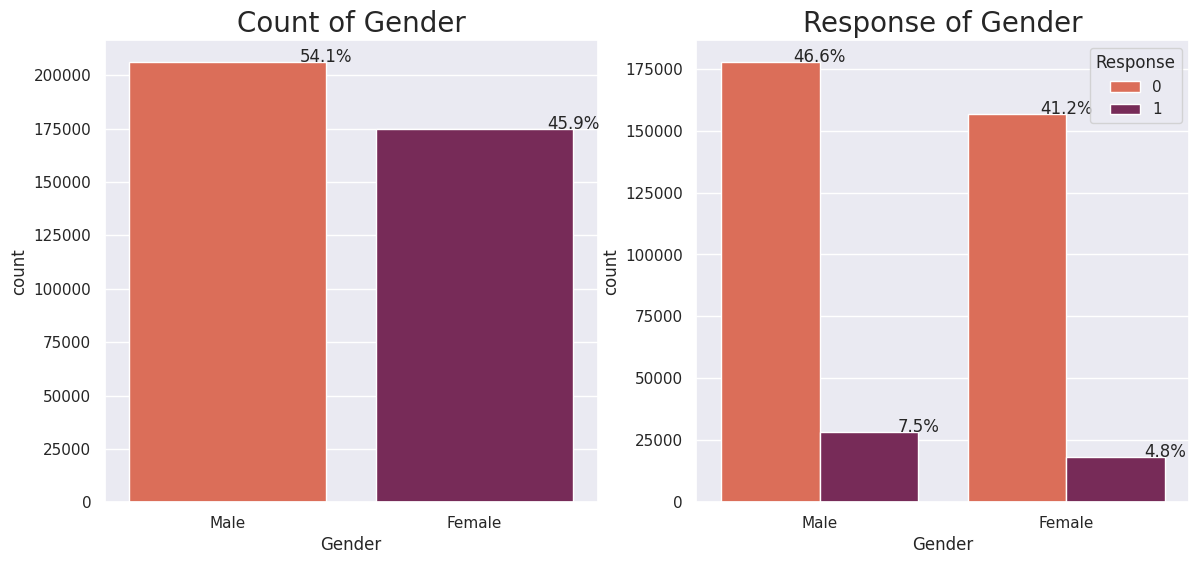

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(data))
ax1 = sns.countplot(x='Gender',palette="rocket_r", data=data)
plt.title('Count of Gender',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(data))
ax2 = sns.countplot(x='Gender',hue='Response',palette="rocket_r", data=data)
plt.title('Response of Gender',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()


As we can see from the graph,

* The gender variable in the dataset is spread nearly evenly. The male category is marginally larger than the female category, and the likelihood of purchasing insurance is also slightly higher.

* The response rate of those who are not interested in purchasing vehicle insurance is higher than that of those who are  interested to buy vehicle insurance.

* Only 12.3% people are interested in buying vehicle insurance and 87.7% are not interested to buy vehicle insurance


#**Driving License**

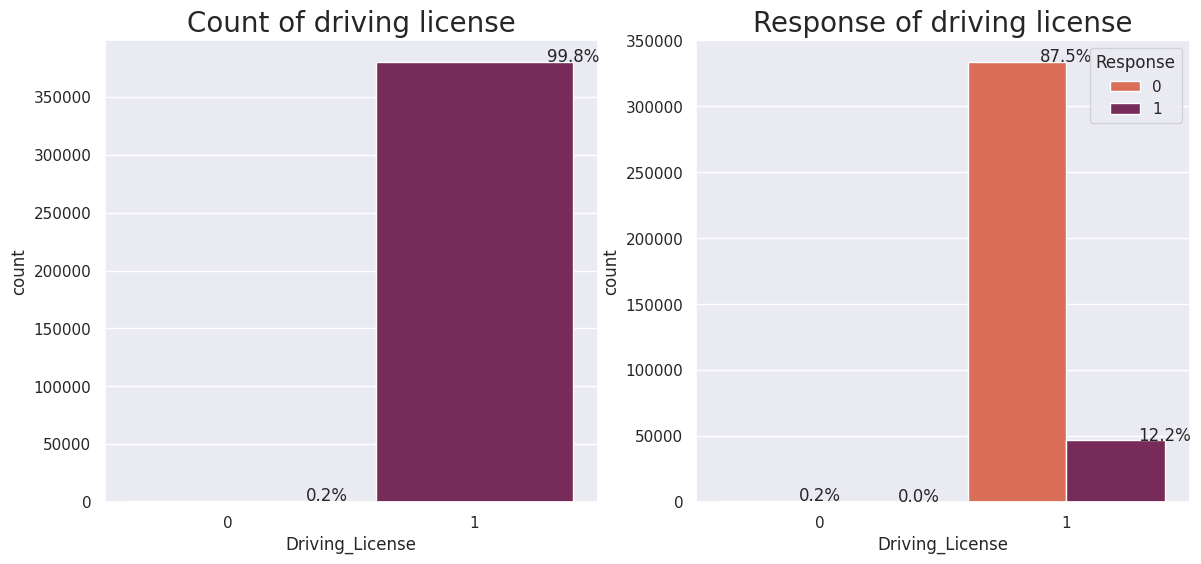

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(data))
ax1 = sns.countplot(x='Driving_License',palette="rocket_r", data=data)
plt.title('Count of driving license',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(data))
ax2 = sns.countplot(x='Driving_License',hue='Response',palette="rocket_r", data=data)
plt.title('Response of driving license',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

As we can see from the graph,

*   99.8% of customers have DL, whereas 0.2% do not have DL.
*   Only a small percentage of people who have a DL (12.2%) are interested in buying insurance.



As we can see from the graph,

*   45.8% people are insured previously, in that 12.2% poeple interested to buy the vehicle insurance again(insurance might be expired or should be renewed), Which means people are aware of insurance policy and ready to pay a premium amount, for better off taking actions to avoid certain risks or reduce risk.

*   So buying insurance makes the most sense when the potential loss is great and there is a significant probability of loss.

#**Vehicle Age**

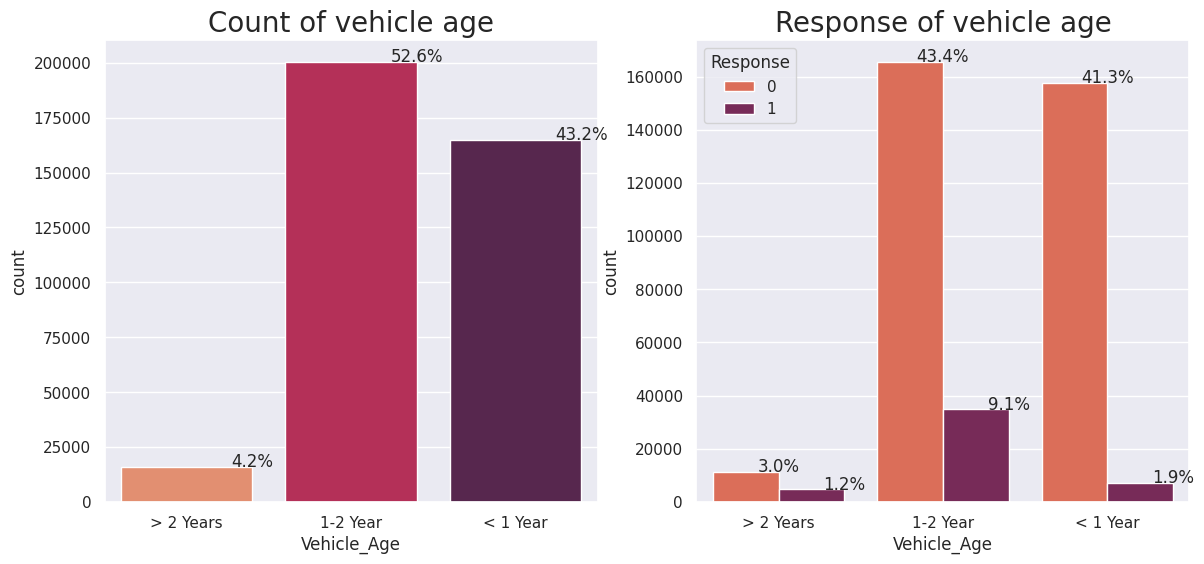

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(data))
ax1 = sns.countplot(x='Vehicle_Age',palette="rocket_r", data=data)
plt.title('Count of vehicle age',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(data))
ax2 = sns.countplot(x='Vehicle_Age',hue='Response',palette="rocket_r", data=data)
plt.title('Response of vehicle age',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

As we can see from the graph,

*   Around 4.2% of vehicles are more than two years old, 52.6% are between one and two years old, and 43.2% are under one year old.
*   1.2% are interested in purchasing vehicle insurance for vehicles older than 2 years, 9.1% are interested in purchasing insurance for vehicles between 1 and 2 years old, and 1.9% are interested in purchasing insurance for vehicles older than 1 year.

As vehicle age increases most of the people are aware of insurance and interested to buy the insurance for reducing the risk


#**Annual Premium**

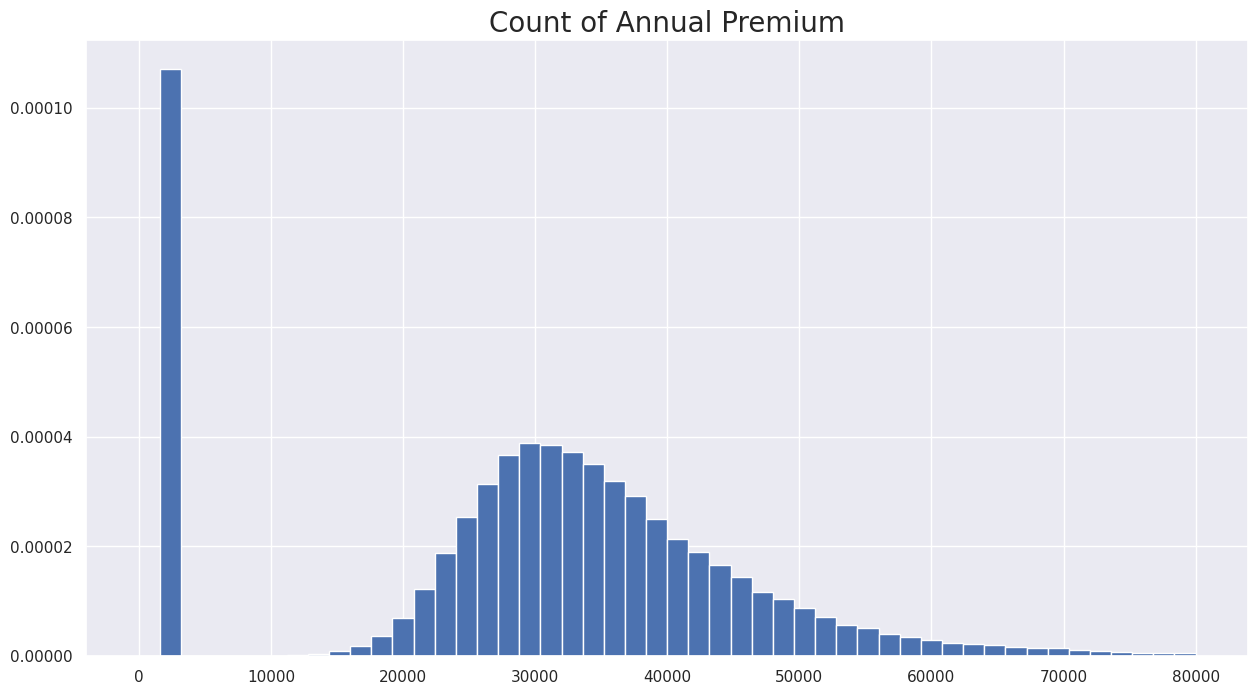

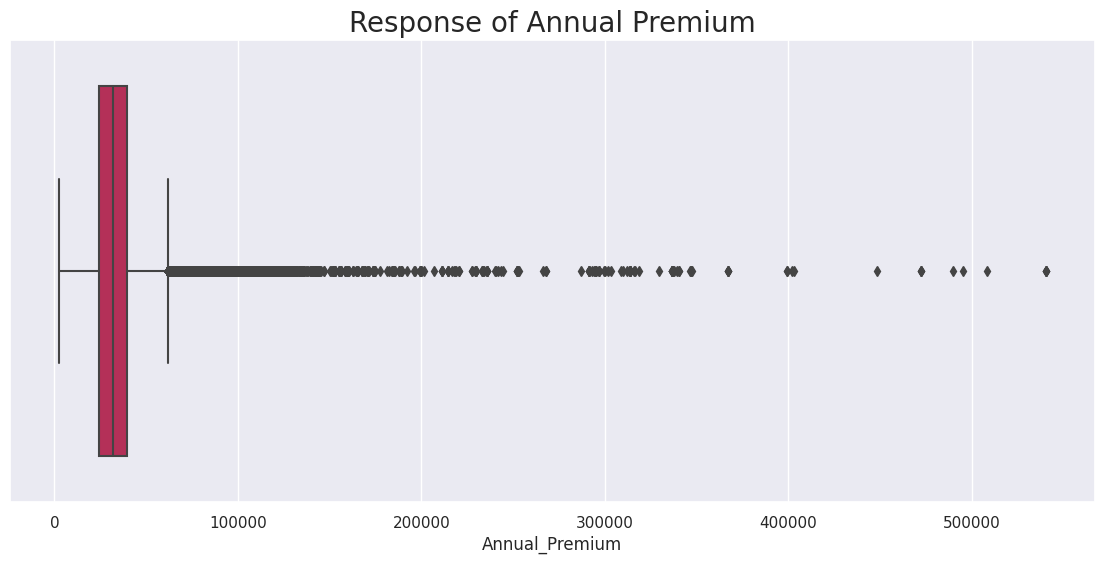

In [ ]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
data['Annual_Premium'].hist(figsize=(15,8), bins = 50, density = True, range=[0, 80000])
plt.title('Count of Annual Premium',fontsize=20)
plt.show()
plt.figure(figsize=(14,6))
sns.boxplot(x='Annual_Premium',palette="rocket_r", data=data)
plt.title('Response of Annual Premium',fontsize=20)
plt.show()

*   From the distribution plot we can infer that the annual premimum variable is right skewed
*   From the boxplot we can observe lot of outliers in the variable


#**Vehicle Damage**

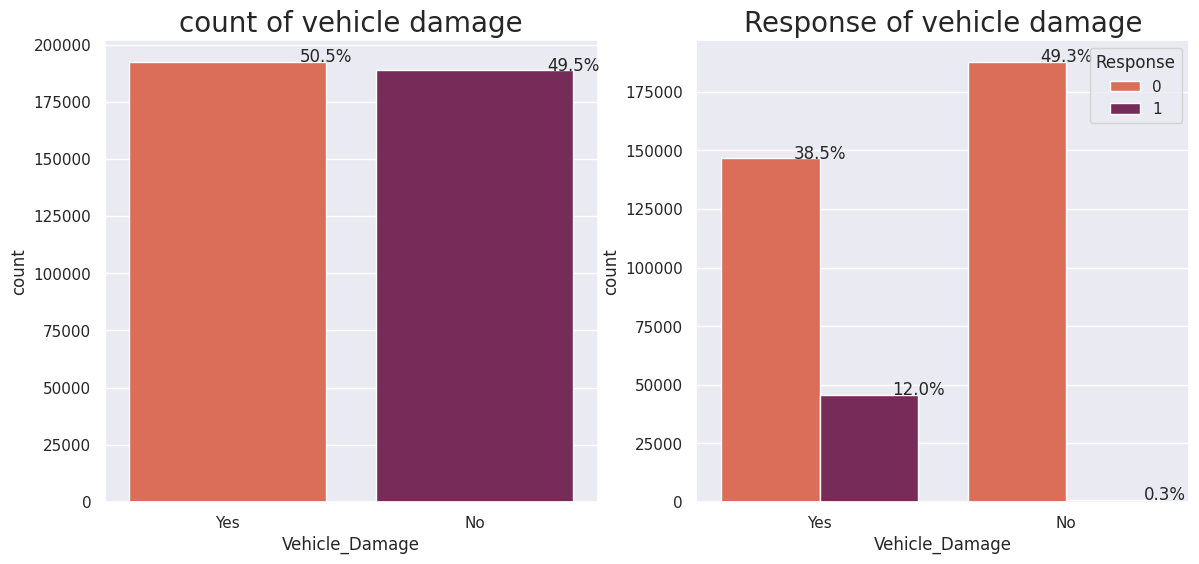

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(data))
ax1 = sns.countplot(x='Vehicle_Damage',palette="rocket_r", data=data)
plt.title('count of vehicle damage',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(data))
ax2 = sns.countplot(x='Vehicle_Damage',hue='Response',palette="rocket_r", data=data)
plt.title('Response of vehicle damage',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

As we can see from the graph,

*   50.5% of the vehicles have past damage
*   12.0% of people who have had a damaged vehicle in the past want to acquire vehicle insurance


#**Vintage**

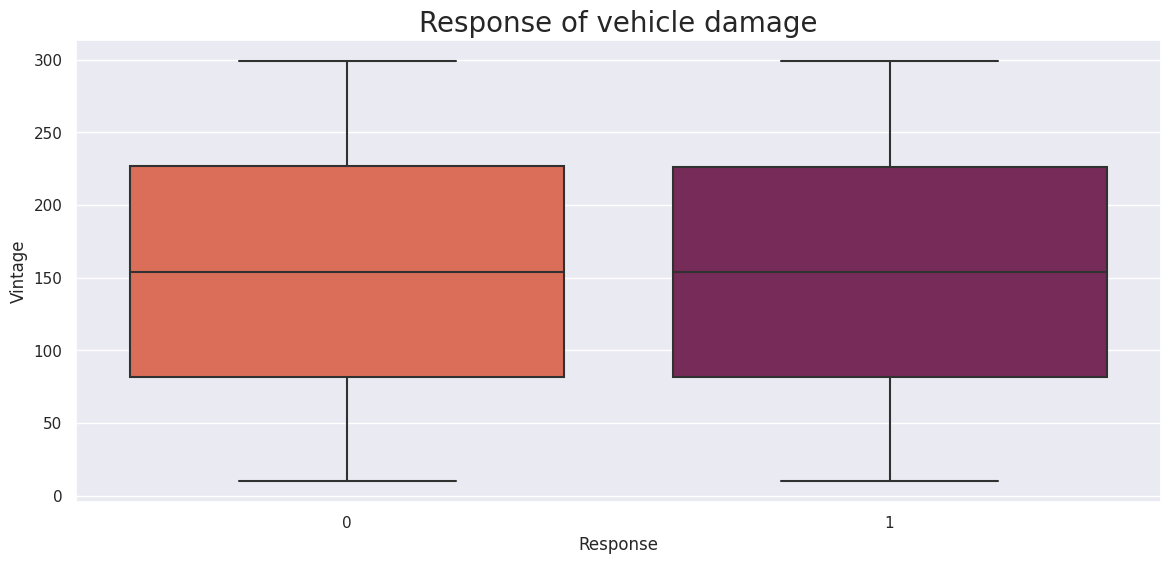

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Response',y='Vintage',palette="rocket_r", data=data)
plt.title('Response of vehicle damage',fontsize=20)
plt.show()


*   We can also see that Vintage has an almost uniform distribution from above figure.


#**Age**

In [ ]:
#histogram of Age
plt.figure(figsize = (14,6))
data.groupby('Response').Age.hist(range=[20, 80], align = 'mid', bins=60, figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.legend(['Response = 0', 'Response = 1'])
plt.show()

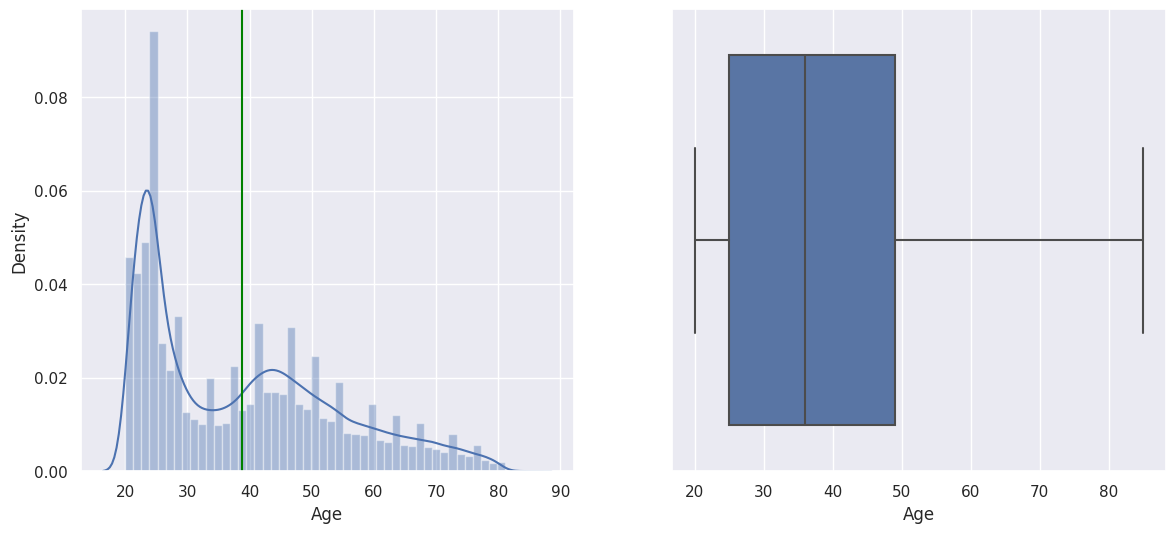

In [ ]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
ax=sns.distplot(data['Age'])
ax.axvline(data['Age'].mean(),color='green')
plt.subplot(1,2,2)
sns.boxplot(x = 'Age',data=data)
plt.show()

*   The dataset has more individuals with an age of 24.
*   40 to 60-year-olds had a higher likelihood of purchasing vehicle insurance.
*   From the above boxplot we can see that there no outlier in the dataset.

In [ ]:
data['Ages']=data['Age']

data.loc[(data['Ages']>=20) & (data['Ages']<27),'Age_label']='Teenagers(20-26)'
data.loc[(data['Ages']>=27) & (data['Ages']<29),'Age_label']='Young(27-28)'
data.loc[(data['Ages']>=29) & (data['Ages']<58),'Age_label']='Middle Age(29-57)'
data.loc[(data['Ages']>=58) & (data['Ages']<=85),'Age_label']='Old Age(58-84)'

data.loc[(data['Ages']>=20) & (data['Ages']<27),'Ages']=0
data.loc[(data['Ages']>=27) & (data['Ages']<29),'Ages']=1
data.loc[(data['Ages']>=29) & (data['Ages']<58),'Ages']=2
data.loc[(data['Ages']>=58) & (data['Ages']<=85),'Ages']=3

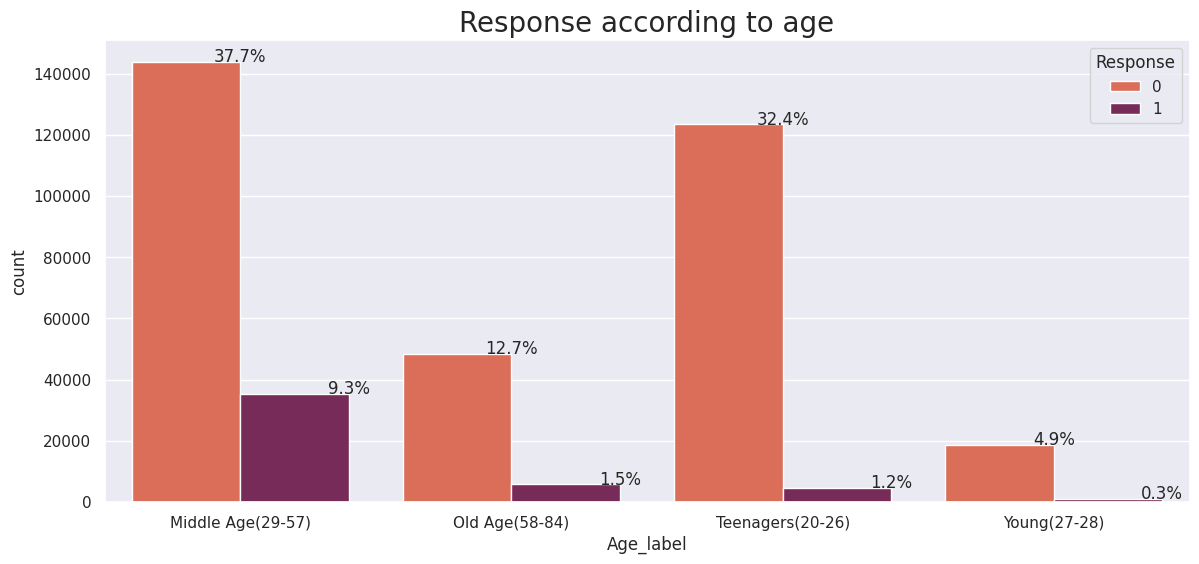

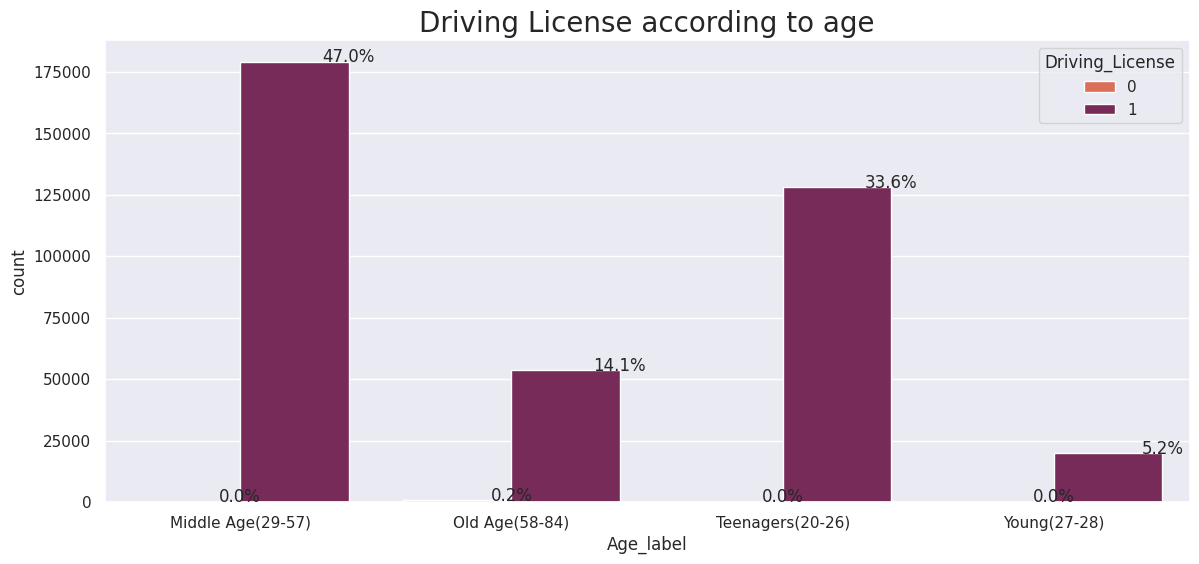

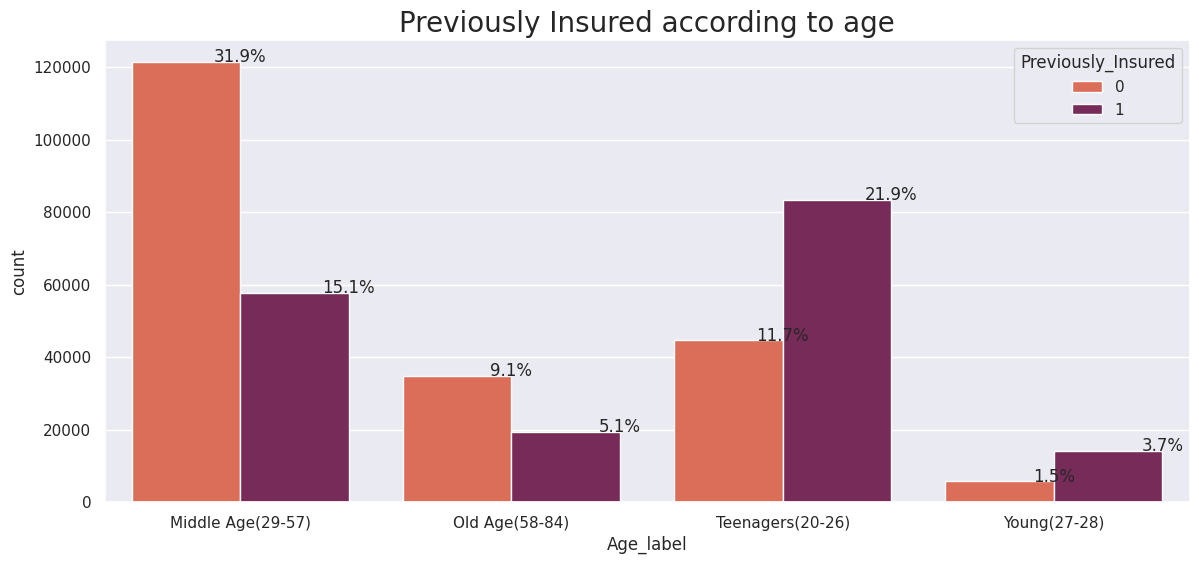

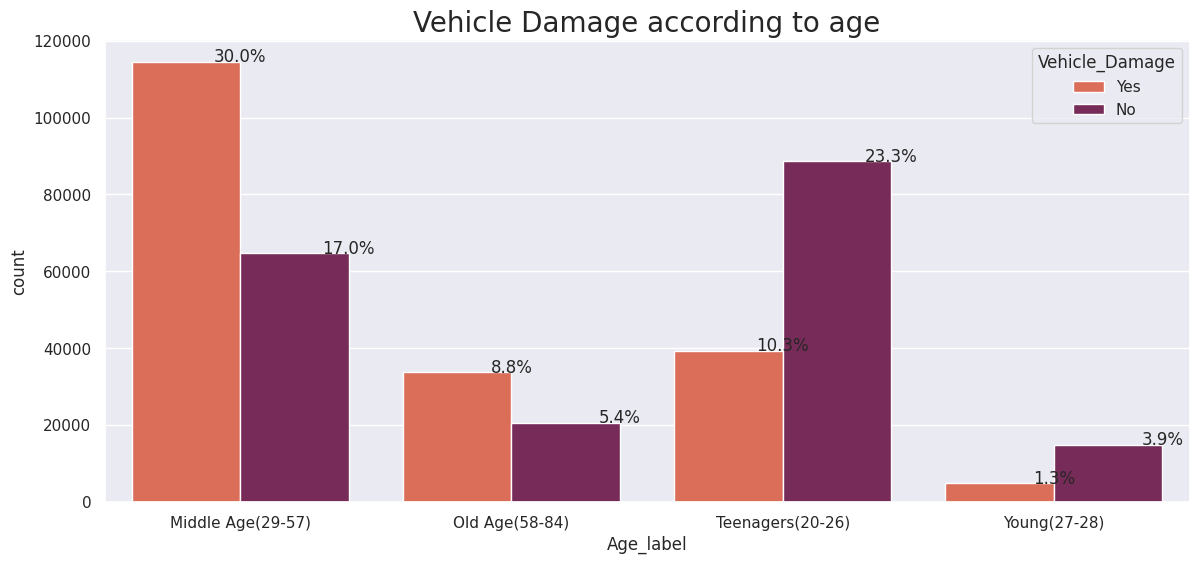

In [ ]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
total = float(len(data))
ax = sns.countplot(x='Age_label',hue='Response',palette="rocket_r", data=data)
plt.title('Response according to age',fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
total = float(len(data))
ax = sns.countplot(x='Age_label',hue='Driving_License',palette="rocket_r", data=data)
plt.title('Driving License according to age',fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
total = float(len(data))
ax = sns.countplot(x='Age_label',hue='Previously_Insured',palette="rocket_r", data=data)
plt.title('Previously Insured according to age',fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
total = float(len(data))
ax = sns.countplot(x='Age_label',hue='Vehicle_Damage',palette="rocket_r", data=data)
plt.title('Vehicle Damage according to age',fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()



According to age wise:

*   9.3% of people in their middle age people are interested in purchasing insurance.
*   Almost 47% of middle-aged individuals have a driver's licence.
*   About 21.9% of people in their teens have health insurance.
*   Around 21.9% of persons in their teens have had insurance previously.

So most teenagers have insurance and are aware of their policy. So the target audience might be middle-aged people and teenagers to generate more leads for insurance companies.

In [ ]:
data.drop(columns=['Ages','Age_label'],axis=1,inplace=True)

#**Correlation Matrix**

<Axes: >

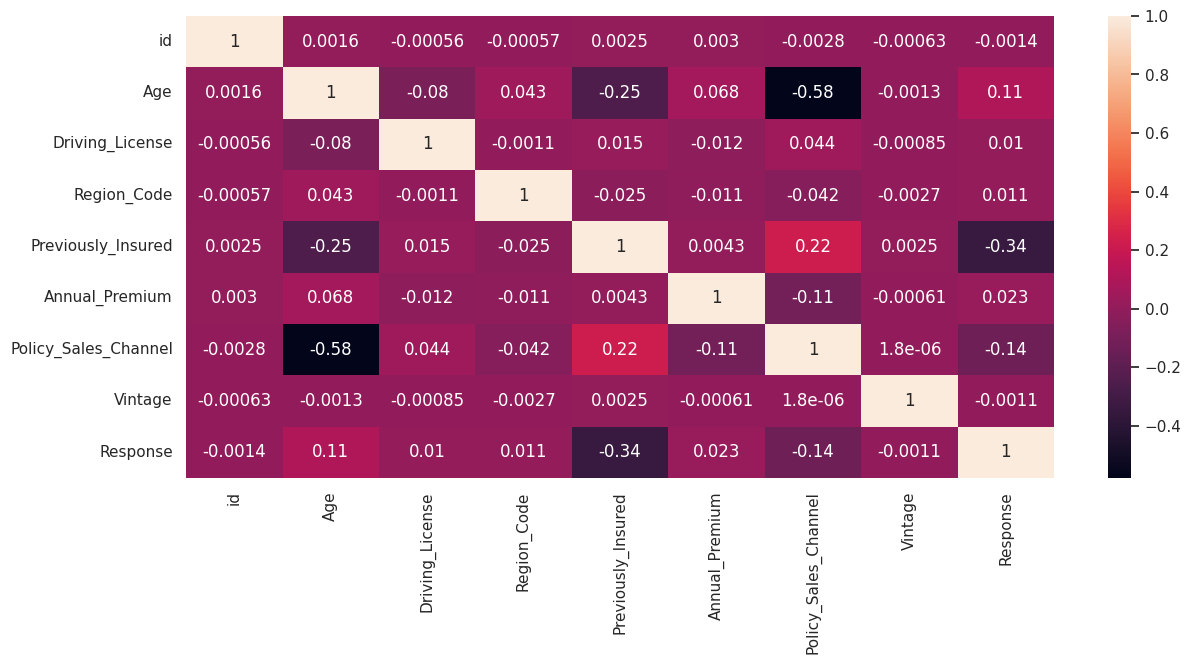

In [ ]:
plt.figure(figsize = (14,6))
sns.heatmap(data.corr(), annot = True)

In [ ]:
# Finding Multicollinearity
def cal_vif(X):
    # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

In [ ]:
cal_vif(data[[i for i in data.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.976952
1,Age,10.457630
2,Driving_License,37.690580
3,Region_Code,4.954198
4,Previously_Insured,1.986389
5,Annual_Premium,4.174946
6,Policy_Sales_Channel,7.750265
7,Vintage,4.373295


**Correlation**: You can only determine how much two variables are linearly reliant on one another by looking at their correlations.


*   The variables are said to be positively connected if the value is positive.

*   The variables are said to be negatively linked if the value is negative.
*   It is said that there is no correlation between the variables if the value is zero or very near to it.

Since practically every customer has a driver's license, it is useless to insure anyone without one because it would be detrimental to the business. Hence, we wouldn't provide vehicle insurance to someone who didn't have a license to drive. As we can drop driving license column as they are not providing any valuable information.



# Preprocessing

**Dectect outlier of Annual_Premium**

In [ ]:
def detect_outliers(df,feat):
    Q1 = data[feat].quantile(0.25)
    Q3 = data[feat].quantile(0.75)
    IQR = Q3 - Q1
    #data[~ ((data['Annual_Premium'] < (Q1 - 1.5 * IQR)) |(data['Annual_Premium'] > (Q3 + 1.5 * IQR))) ]
    return df[((df[feat] < (Q1 - 1.5 * IQR)) |(data[feat] > (Q3 + 1.5 * IQR))) ].shape[0]

def clean_outliers(df,feat):
    Q1 = data[feat].quantile(0.25)
    Q3 = data[feat].quantile(0.75)
    IQR = Q3 - Q1
    return df[~ ((df[feat] < (Q1 - 1.5 * IQR)) |(data[feat] > (Q3 + 1.5 * IQR))) ]

In [ ]:
data_cats=['Gender','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel','Vintage']
data_nums=['Age','Annual_Premium']
data_all=data_cats+data_nums

In [ ]:
for feat in data_nums:
    res=detect_outliers(data,feat)
    if (res>0):
        print('%d Outlier detected in feature %s' % (res,feat))

10320 Outlier detected in feature Annual_Premium


*Clean outlier*

In [ ]:
clean_data=clean_outliers(data,'Annual_Premium')
clean_data.shape

(370789, 12)

**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data[data_cats+data_nums], clean_data.Response, test_size=0.2, random_state=1)

**Encoder **

In [ ]:
def prepare_inputs(train):
    oe = OrdinalEncoder()
    oe.fit(train)
    return oe

In [ ]:
oe=prepare_inputs(data[data_cats])

X_train_enc=oe.transform(X_train[data_cats])
X_test_enc=oe.transform(X_test[data_cats])

# there is 2 unknown new Policy_Sales_Channel values in test 141 and 142
# we replace them with 140

test_df.loc[test_df['Policy_Sales_Channel']==141.0, 'Policy_Sales_Channel']=140.0
test_df.loc[test_df['Policy_Sales_Channel']==142.0, 'Policy_Sales_Channel']=140.0

test_df_enc=oe.transform(test_df[data_cats])


In [ ]:
all_train_enc=np.concatenate((X_train_enc, X_train[data_nums].values), axis=1)
all_test_enc=np.concatenate((X_test_enc, X_test[data_nums].values), axis=1)

all_test_df_enc=np.concatenate((test_df_enc, test_df[data_nums].values), axis=1)

**Solve oversampling problem by RandomOverSampler**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

ros = RandomOverSampler(random_state=42, sampling_strategy='minority')
all_train_enc_over_sampled, y_train_over_sampled = ros.fit_resample(all_train_enc, y_train)

# ada = ADASYN(random_state=42)
# all_train_enc_over_sampled, y_train_over_sampled = ada.fit_resample(all_train_enc, y_train)

y_train=y_train_over_sampled

**Standard Scale **

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(all_train_enc)
X_train_transformed = scaler.transform(all_train_enc_over_sampled)
X_test_transformed = scaler.transform(all_test_enc)
all_test_df_transformed = scaler.transform(all_test_df_enc)

# Model Building

In [ ]:
rf=RandomForestClassifier(max_depth=7,min_samples_leaf=4,n_estimators=50,random_state=55, n_jobs=-1)
logreg = LogisticRegression(solver='newton-cg',random_state=55, n_jobs=-1)
gb = GradientBoostingClassifier(random_state=55)
gnb = GaussianNB()
xgb = XGBClassifier(random_state=55, nthread=-1)

In [ ]:
models=[rf ,logreg, gb, gnb, xgb]
model_names=['RandomForestClassifier','LogisticRegression','GradientBoostingClassifier','GaussianNB','XGBClassifier']
cv = StratifiedKFold(10, shuffle=True, random_state=42)

In [ ]:
for model in models:
  model.fit(X_train_transformed,y_train)

**Feature importance of Random Forest**

Feature ranking:
1. Vehicle_Damage (0.420476)
2. Previously_Insured (0.386979)
3. Age (0.093567)
4. Policy_Sales_Channel (0.053007)
5. Vehicle_Age (0.036254)
6. Region_Code (0.004759)
7. Annual_Premium (0.002587)
8. Gender (0.001384)
9. Vintage (0.000986)


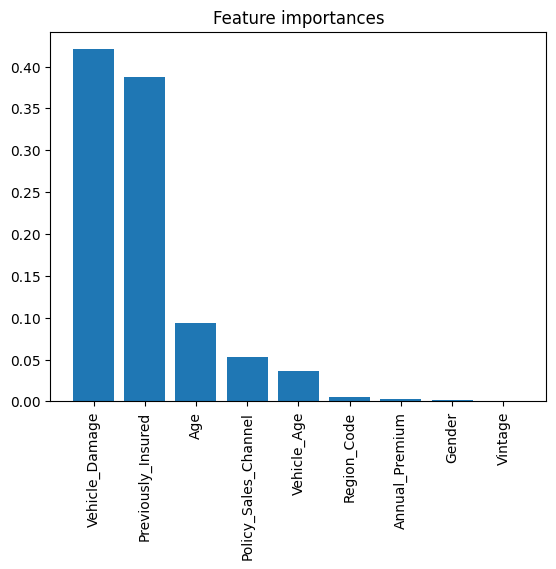

In [ ]:
#Random Forest

importances = rf.feature_importances_
indices = importances.argsort()[::-1]

feature_names = data_all
print("Feature ranking:")
for f in range(X_train_transformed.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_transformed.shape[1]), importances[indices])
plt.xticks(range(X_train_transformed.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.show()

Gender                  0.065534
Region_Code            -0.009175
Previously_Insured     -2.030037
Vehicle_Age            -0.121016
Vehicle_Damage          1.060377
Policy_Sales_Channel   -0.181548
Vintage                -0.007481
Age                    -0.081659
Annual_Premium          0.021200
dtype: float64


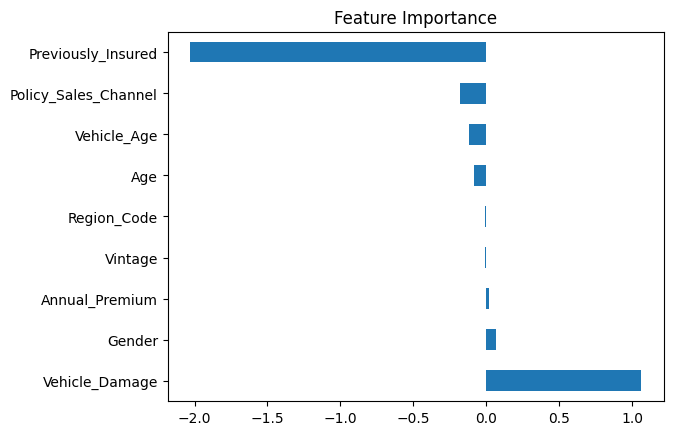

In [ ]:
#Logistic Regression
importance = logreg.coef_[0]
feat_importances = pd.Series(importance, index=feature_names)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')
print(feat_importances)



Feature ranking:
1. Vehicle_Damage (0.759915)
2. Previously_Insured (0.124463)
3. Age (0.077959)
4. Policy_Sales_Channel (0.021247)
5. Vehicle_Age (0.007520)
6. Region_Code (0.007235)
7. Annual_Premium (0.001314)
8. Gender (0.000225)
9. Vintage (0.000122)


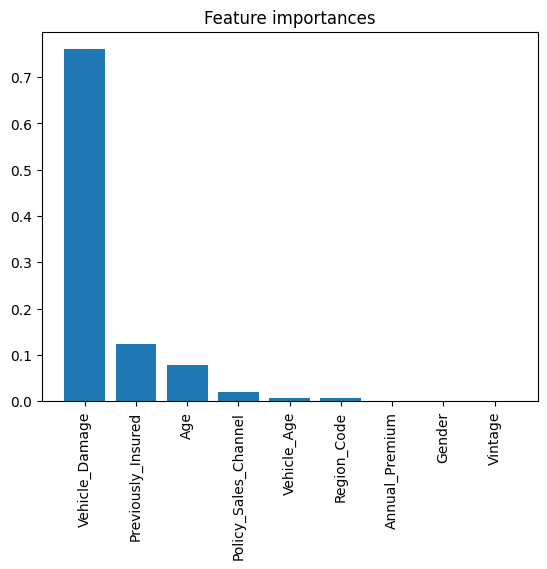

In [ ]:
#Gradient Boosting

importances = gb.feature_importances_
indices = importances.argsort()[::-1]

print("Feature ranking:")
for f in range(X_train_transformed.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_transformed.shape[1]), importances[indices])
plt.xticks(range(X_train_transformed.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.show()

Feature ranking:
1. Previously_Insured (0.488496)
2. Vehicle_Damage (0.481811)
3. Age (0.008174)
4. Vehicle_Age (0.005641)
5. Policy_Sales_Channel (0.004907)
6. Region_Code (0.003383)
7. Gender (0.002978)
8. Annual_Premium (0.002445)
9. Vintage (0.002166)


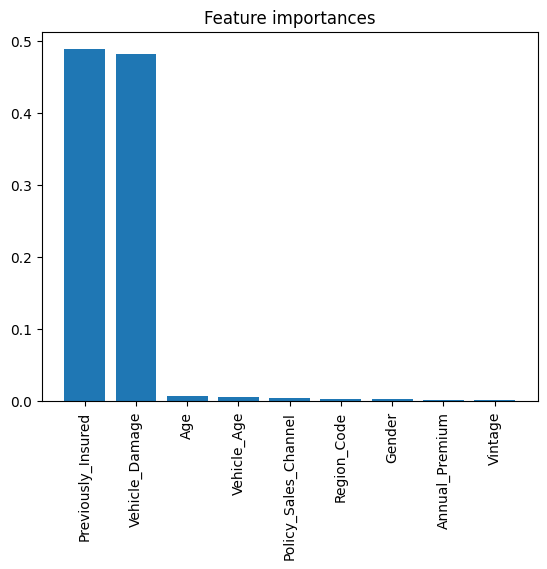

In [ ]:
#XGB

importances = xgb.feature_importances_
indices = importances.argsort()[::-1]

print("Feature ranking:")
for f in range(X_train_transformed.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_transformed.shape[1]), importances[indices])
plt.xticks(range(X_train_transformed.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.show()

Permutation Importance Scores:
Gender: 0.0
Region_Code: 0.0
Previously_Insured: -0.0962561917347645
Vehicle_Age: 0.0
Vehicle_Damage: -0.08962665300214856
Policy_Sales_Channel: 0.0
Vintage: 0.0
Age: 0.0
Annual_Premium: 0.0


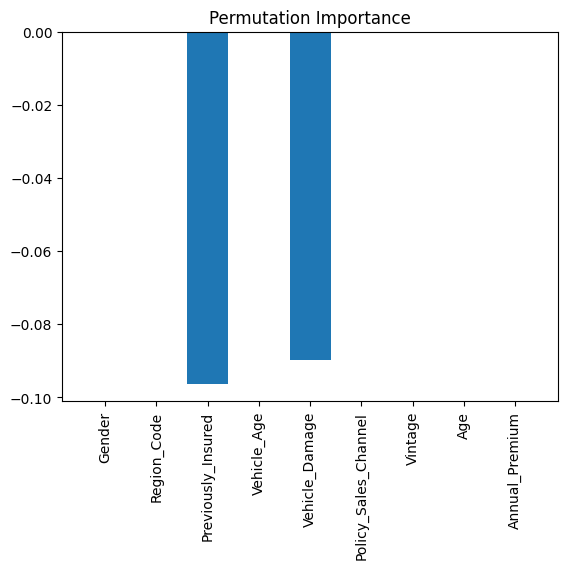

In [ ]:
#Gaussian Naive Bayes
from sklearn.inspection import permutation_importance

imps = permutation_importance(gnb, X_test_transformed, y_test, n_repeats=30, random_state=0)

print("Permutation Importance Scores:")
for i, score in enumerate(imps.importances_mean):
    print(f"{feature_names[i]}: {score}")

plt.figure()
plt.title("Permutation Importance")
plt.bar(range(len(feature_names)), imps.importances_mean)
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.show()



Recall: 0.9760712298274903
Precision: 0.24837860035684953
AUC score: 0.784431361618669
Recall standard deviation: 0.0
Precision standard deviation: 0.0
AUC score standard deviation: 0.0


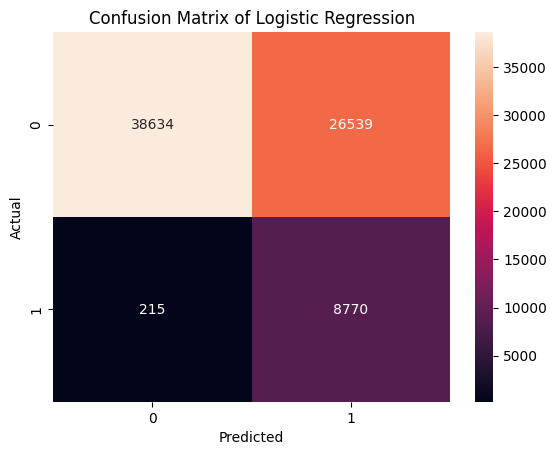

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred_logistic = logreg.predict(X_test_transformed)
recall_logistic = sklearn.metrics.recall_score(y_test, y_pred_logistic)
precision_logistic = sklearn.metrics.precision_score(y_test, y_pred_logistic)
auc_score_logistic = sklearn.metrics.roc_auc_score(y_test, y_pred_logistic)

# Calculate the standard deviation of recall, precision, and AUC score
recall_std_logistic = np.sqrt(np.var(recall_logistic))
precision_std_logistic = np.sqrt(np.var(precision_logistic))
auc_score_std_logistic = np.sqrt(np.var(auc_score_logistic))

# Print the results
print('Recall:', recall_logistic)
print('Precision:', precision_logistic)
print('AUC score:', auc_score_logistic)
print('Recall standard deviation:', recall_std_logistic)
print('Precision standard deviation:', precision_std_logistic)
print('AUC score standard deviation:', auc_score_std_logistic)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# Draw the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()


<ipython-input-73-73beca4cb77b>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


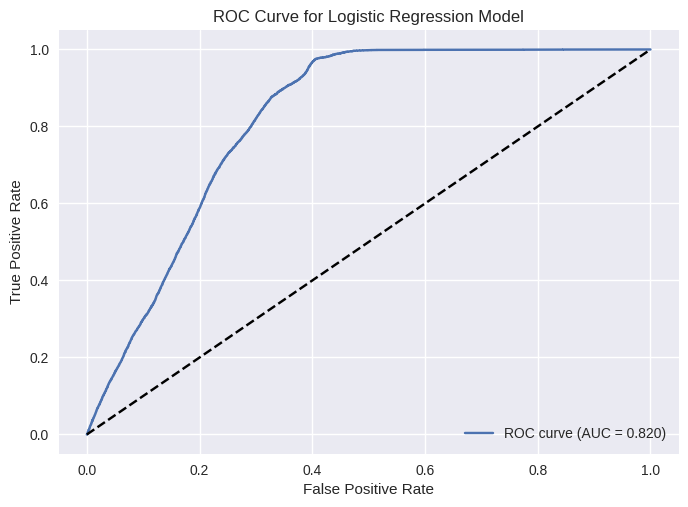

In [ ]:
# Calculate the ROC
y_pred_prob_logistic=logreg.predict_proba(X_test_transformed)
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_prob_logistic[:,1])

# Calculate the AUC score
auc_score = auc(fpr_logistic, tpr_logistic)
import matplotlib.pyplot as plt

plt.plot(fpr_logistic, tpr_logistic, label='ROC curve (AUC = {:.3f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.style.use('seaborn')
plt.grid(True)
plt.show()


Recall: 0.9365609348914858
Precision: 0.2725770925110132
AUC score: 0.7959928636834487
Recall standard deviation: 0.0
Precision standard deviation: 0.0
AUC score standard deviation: 0.0


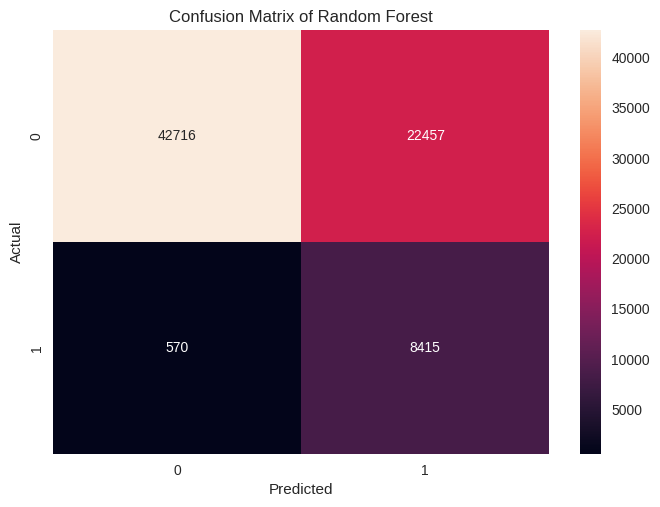

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred_rf = rf.predict(X_test_transformed)
recall_rf = sklearn.metrics.recall_score(y_test, y_pred_rf)
precision_rf = sklearn.metrics.precision_score(y_test, y_pred_rf)
auc_score_rf = sklearn.metrics.roc_auc_score(y_test, y_pred_rf)

# Calculate the standard deviation of recall, precision, and AUC score
recall_std_rf = np.sqrt(np.var(recall_rf))
precision_std_rf = np.sqrt(np.var(precision_rf))
auc_score_std_rf = np.sqrt(np.var(auc_score_rf))

# Print the results
print('Recall:', recall_rf)
print('Precision:', precision_rf)
print('AUC score:', auc_score_rf)
print('Recall standard deviation:', recall_std_rf)
print('Precision standard deviation:', precision_std_rf)
print('AUC score standard deviation:', auc_score_std_rf)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Draw the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest')
plt.show()


<ipython-input-72-87dddff1cef7>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


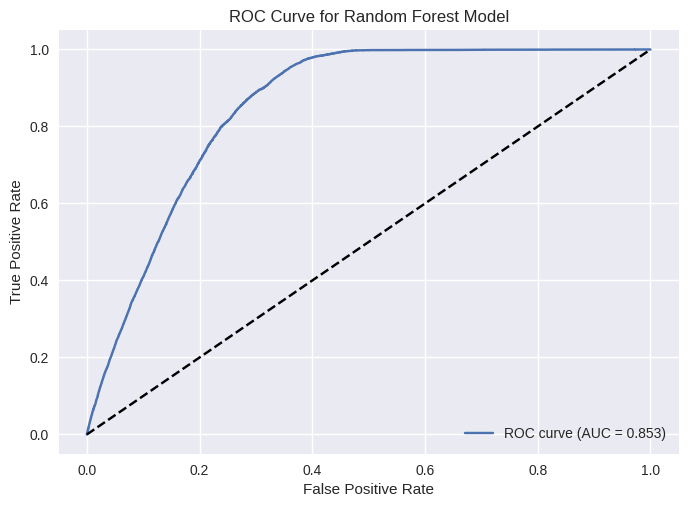

In [ ]:
# Calculate the ROC curve
y_pred_prob_rf=rf.predict_proba(X_test_transformed)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf[:,1])

# Calculate the AUC score
auc_score_rf = auc(fpr_rf, tpr_rf)
import matplotlib.pyplot as plt

plt.plot(fpr_rf, tpr_rf, label='ROC curve (AUC = {:.3f})'.format(auc_score_rf))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.style.use('seaborn')
plt.show()


Recall: 0.9281023928770172
Precision: 0.27858884842815623
AUC score: 0.7983844325945855
Recall standard deviation: 0.0
Precision standard deviation: 0.0
AUC score standard deviation: 0.0


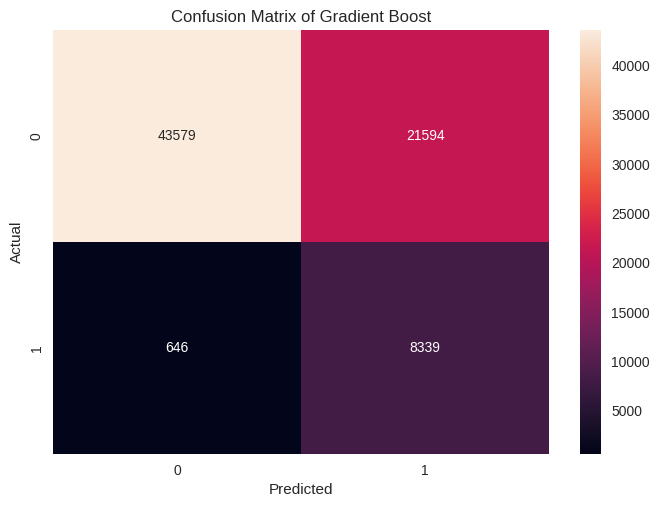

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred_gb = gb.predict(X_test_transformed)
recall_gb = sklearn.metrics.recall_score(y_test, y_pred_gb)
precision_gb = sklearn.metrics.precision_score(y_test, y_pred_gb)
auc_score_gb = sklearn.metrics.roc_auc_score(y_test, y_pred_gb)

# Calculate the standard deviation of recall, precision, and AUC score
recall_std_gb = np.sqrt(np.var(recall_gb))
precision_std_gb = np.sqrt(np.var(precision_gb))
auc_score_std_gb = np.sqrt(np.var(auc_score_gb))

# Print the results
print('Recall:', recall_gb)
print('Precision:', precision_gb)
print('AUC score:', auc_score_gb)
print('Recall standard deviation:', recall_std_gb)
print('Precision standard deviation:', precision_std_gb)
print('AUC score standard deviation:', auc_score_std_gb)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Draw the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.show()


<ipython-input-70-3a5e1fb86eaf>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


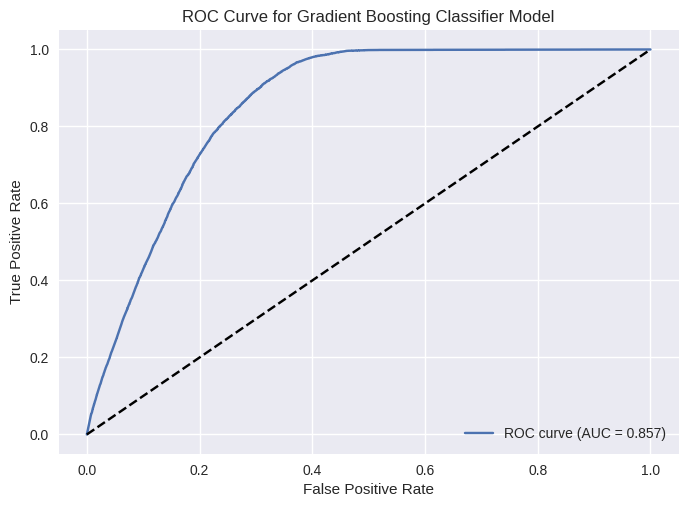

In [ ]:
# Calculate the ROC
y_pred_prob_gb=gb.predict_proba(X_test_transformed)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb[:,1])

# Calculate the AUC score
auc_score_gb = auc(fpr_gb, tpr_gb)
import matplotlib.pyplot as plt

plt.plot(fpr_gb, tpr_gb, label='ROC curve (AUC = {:.3f})'.format(auc_score_gb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier Model')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.style.use('seaborn')
plt.show()


Recall: 0.9760712298274903
Precision: 0.24837860035684953
AUC score: 0.784431361618669
Recall standard deviation: 0.0
Precision standard deviation: 0.0
AUC score standard deviation: 0.0


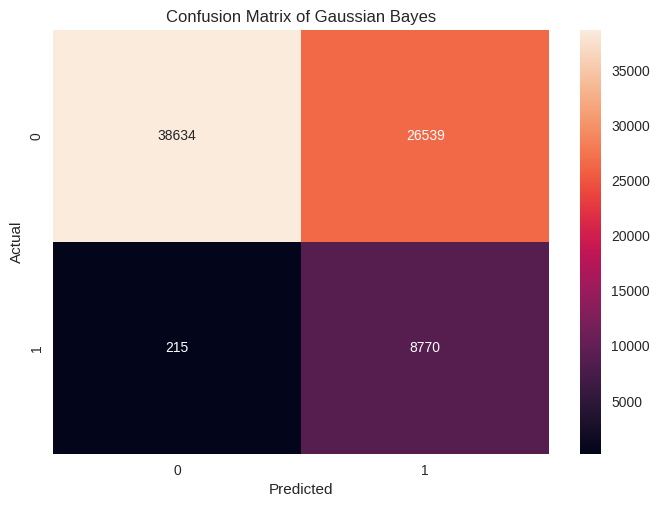

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred_gnb = gnb.predict(X_test_transformed)
recall_gnb = sklearn.metrics.recall_score(y_test, y_pred_gnb)
precision_gnb = sklearn.metrics.precision_score(y_test, y_pred_gnb)
auc_score_gnb = sklearn.metrics.roc_auc_score(y_test, y_pred_gnb)

# Calculate the standard deviation of recall, precision, and AUC score
recall_std_gnb = np.sqrt(np.var(recall_gnb))
precision_std_gnb = np.sqrt(np.var(precision_gnb))
auc_score_std_gnb = np.sqrt(np.var(auc_score_gnb))

# Print the results
print('Recall:', recall_gnb)
print('Precision:', precision_gnb)
print('AUC score:', auc_score_gnb)
print('Recall standard deviation:', recall_std_gnb)
print('Precision standard deviation:', precision_std_gnb)
print('AUC score standard deviation:', auc_score_std_gnb)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_gnb)

# Draw the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Gaussian Bayes')
plt.show()


<ipython-input-68-2b14b4f0aca0>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


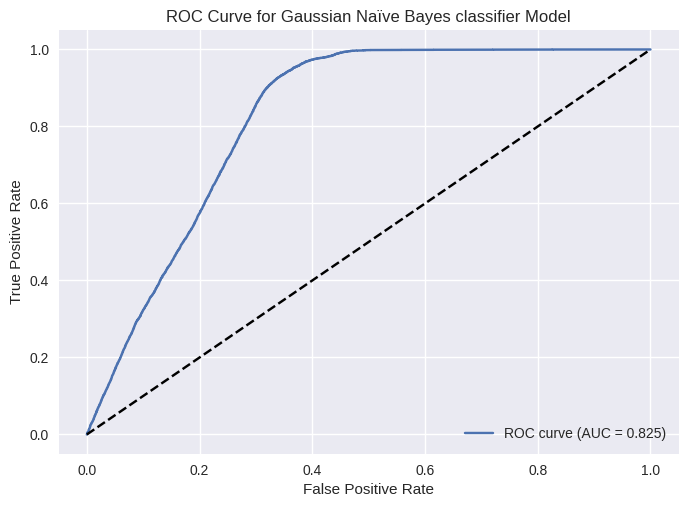

In [ ]:
# Calculate the ROC curve
y_pred_prob_gnb=gnb.predict_proba(X_test_transformed)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_prob_gnb[:,1])

# Calculate the AUC score
auc_score_gnb = auc(fpr_gnb, tpr_gnb)
import matplotlib.pyplot as plt

plt.plot(fpr_gnb, tpr_gnb, label='ROC curve (AUC = {:.3f})'.format(auc_score_gnb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naïve Bayes classifier Model')
plt.legend(loc='lower right')
plt.style.use('seaborn')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()


Recall: 0.9011686143572621
Precision: 0.28667020711630375
AUC score: 0.7960110943450958
Recall standard deviation: 0.0
Precision standard deviation: 0.0
AUC score standard deviation: 0.0


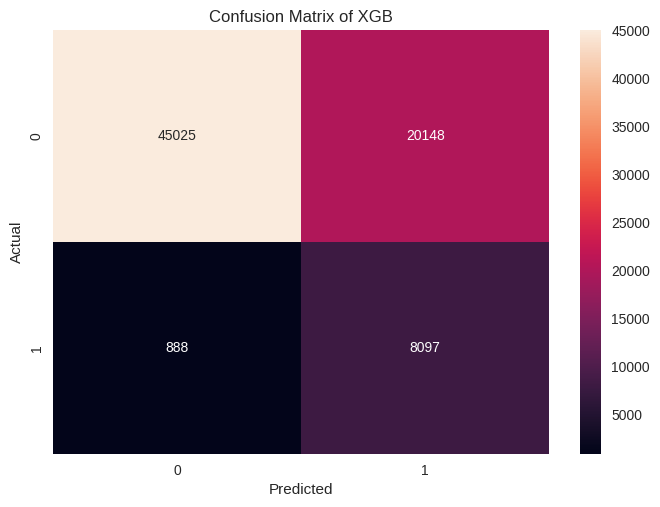

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred_xgb = xgb.predict(X_test_transformed)
recall_xgb = sklearn.metrics.recall_score(y_test, y_pred_xgb)
precision_xgb = sklearn.metrics.precision_score(y_test, y_pred_xgb)
auc_score_xgb = sklearn.metrics.roc_auc_score(y_test, y_pred_xgb)

# Calculate the standard deviation of recall, precision, and AUC score
recall_std_xgb = np.sqrt(np.var(recall_xgb))
precision_std_xgb = np.sqrt(np.var(precision_xgb))
auc_score_std_xgb = np.sqrt(np.var(auc_score_xgb))

# Print the results
print('Recall:', recall_xgb)
print('Precision:', precision_xgb)
print('AUC score:', auc_score_xgb)
print('Recall standard deviation:', recall_std_xgb)
print('Precision standard deviation:', precision_std_xgb)
print('AUC score standard deviation:', auc_score_std_xgb)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Draw the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of XGB')
plt.show()


0.8559092468424498


<ipython-input-66-4d9bb0650b6e>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


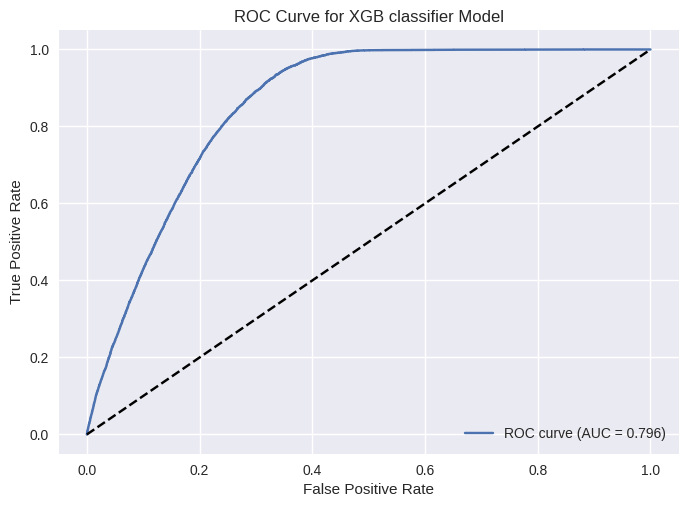

In [ ]:
# Calculate the ROC
y_pred_prob_xgb=xgb.predict_proba(X_test_transformed)
#roc_auc_score = roc_auc_score(y_test, y_pred_prob_xgb[:,1])

# Print the ROC AUC score
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_pred_prob_xgb[:, 1])
print(roc_auc_score)
import matplotlib.pyplot as plt

plt.plot(fpr_xgb, tpr_xgb, label='ROC curve (AUC = {:.3f})'.format(auc_score_xgb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGB classifier Model')
plt.legend(loc='lower right')
plt.style.use('seaborn')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()


In [ ]:
from scipy import stats
import math
# Define the desired confidence level (e.g., 95%)
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for the desired confidence level

In [ ]:
model_results = pd.DataFrame()
row_number = 0
results = []
names = []

for ml in models:
    model_name=ml.__class__.__name__
    print('Training %s model ' % model_name)
    cv_results = cross_validate(ml, X_train_transformed, y_train, cv=cv, scoring='roc_auc', return_train_score=True, n_jobs=-1 )
    model_results.loc[row_number,'Model Name']=model_name
    model_results.loc[row_number, 'Train roc_auc  Mean']=cv_results['train_score'].mean()
    model_results.loc[row_number, 'Test roc_auc  Mean']=cv_results['test_score'].mean()
    model_results.loc[row_number, 'Fit Time Mean']=cv_results['fit_time'].mean()
    results.append(cv_results)
    names.append(model_name)

    row_number+=1

Training RandomForestClassifier model 
Training LogisticRegression model 
Training GradientBoostingClassifier model 
Training GaussianNB model 
Training XGBClassifier model 


In [ ]:
display(model_results.style.background_gradient(cmap='summer_r'))

,Model Name,Train roc_auc Mean,Test roc_auc Mean,Fit Time Mean
0,RandomForestClassifier,0.854739,0.854170,56.487608
1,LogisticRegression,0.820068,0.820020,5.919535
2,GradientBoostingClassifier,0.857288,0.856792,152.954688
3,GaussianNB,0.825148,0.825136,0.302613
4,XGBClassifier,0.881179,0.873000,8.304419


In [ ]:
model_results_precision = pd.DataFrame()
row_number = 0
results_precision = []
names = []

for ml in models:
    model_name=ml.__class__.__name__
    print('Training %s model ' % model_name)
    cv_results = cross_validate(ml, X_train_transformed, y_train, cv=cv, scoring='precision', return_train_score=True, n_jobs=-1 )
    model_results_precision.loc[row_number,'Model Name']=model_name
    model_results_precision.loc[row_number, 'Train precision  Mean']=cv_results['train_score'].mean()
    model_results_precision.loc[row_number, 'Test precision  Mean']=cv_results['test_score'].mean()
    model_results_precision.loc[row_number, 'Fit Time Mean']=cv_results['fit_time'].mean()
    results_precision.append(cv_results)
    names.append(model_name)

    row_number += 1

Training RandomForestClassifier model 
Training LogisticRegression model 
Training GradientBoostingClassifier model 
Training GaussianNB model 
Training XGBClassifier model 


In [ ]:
display(model_results_precision.style.background_gradient(cmap='summer_r'))

,Model Name,Train precision Mean,Test precision Mean,Fit Time Mean
0,RandomForestClassifier,0.730729,0.730421,47.919653
1,LogisticRegression,0.705376,0.705378,4.407053
2,GradientBoostingClassifier,0.736698,0.736352,141.928456
3,GaussianNB,0.705376,0.705378,0.397519
4,XGBClassifier,0.757586,0.753021,7.585516


In [ ]:
model_results_recall = pd.DataFrame()
row_number = 0
results_recall = []
names = []

for ml in models:
    model_name=ml.__class__.__name__
    print('Training %s model ' % model_name)
    cv_results = cross_validate(ml, X_train_transformed, y_train, cv=cv, scoring='recall', return_train_score=True, n_jobs=-1 )
    model_results_recall.loc[row_number,'Model Name']=model_name
    model_results_recall.loc[row_number, 'Train recall  Mean']=cv_results['train_score'].mean()
    model_results_recall.loc[row_number, 'Test recall  Mean']=cv_results['test_score'].mean()
    model_results_recall.loc[row_number, 'Fit Time Mean']=cv_results['fit_time'].mean()
    results_recall.append(cv_results)
    names.append(model_name)

    row_number+=1

Training RandomForestClassifier model 
Training LogisticRegression model 
Training GradientBoostingClassifier model 
Training GaussianNB model 
Training XGBClassifier model 


In [ ]:
display(model_results_recall.style.background_gradient(cmap='summer_r'))

,Model Name,Train recall Mean,Test recall Mean,Fit Time Mean
0,RandomForestClassifier,0.939905,0.939526,49.029178
1,LogisticRegression,0.976568,0.976568,4.836332
2,GradientBoostingClassifier,0.928221,0.927832,142.647772
3,GaussianNB,0.976568,0.976568,0.394454
4,XGBClassifier,0.946298,0.942149,7.254826


In [ ]:
trained_model = xgb

with open("insurance_model.pkl", "wb") as file:
    pickle.dump(trained_model, file)

with open('insurance_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
def predict_decision():
    # Input
    gender_input = input("Gender (M/F): ").strip().lower()
    region_code = float(input("Region Code: "))
    previously_insured_input = input("Previously Insured (Y/N): ").strip().lower()
    vehicle_age = float(input("Vehicle Age (In Years): "))
    vehicle_damage_input = input("Vehicle Damage (Y/N): ").strip().lower()
    annual_premium = float(input("Annual Premium: "))
    age = float(input("Age: "))
    policy_sales_channel = float(input("Policy Sales Channel: "))
    vintage = float(input("Vintage (Days): "))

    # Conditions for input
    # gender
    if gender_input == 'm':
        gender = 'Male'
    elif gender_input == 'f':
        gender = 'Female'
    else:
        print("Invalid input. Assuming 'Male'.")
        gender = 'Male'

    # previously insured
    if previously_insured_input == 'y':
        previously_insured = 1
    elif previously_insured_input == 'n':
        previously_insured = 0
    else:
        print("Invalid input. Assuming 'N'.")
        previously_insured = 0

    # vehicle age
    if vehicle_age < 1:
        vehicle_age_category = '< 1 Year'
    elif 1 <= vehicle_age <= 2:
        vehicle_age_category = '1-2 Year'
    else:
        vehicle_age_category = '> 2 Years'

    # vehicle damage
    if vehicle_damage_input == 'y':
        vehicle_damage = 'Yes'
    elif vehicle_damage_input == 'n':
        vehicle_damage = 'No'
    else:
        print("Invalid input. Assuming 'N'.")
        vehicle_damage = 'No'


    input_data = {
        'Gender': gender,
        'Region_Code': region_code,
        'Previously_Insured': previously_insured,
        'Vehicle_Age': vehicle_age_category,
        'Vehicle_Damage': vehicle_damage,
        'Annual_Premium': annual_premium,
        'Age': age,
        'Policy_Sales_Channel': policy_sales_channel,
        'Vintage': vintage,
    }

    # pre-processing
    input_df = pd.DataFrame([input_data])
    input_data_enc1 = oe.transform(input_df[data_cats])
    input_data_enc2 = np.concatenate((input_data_enc1, input_df[data_nums].values), axis=1)
    input_data_scaled = scaler.transform(input_data_enc2)

    predicted_class = loaded_model.predict(input_data_scaled)
    prediction_result = "Yes" if predicted_class[0] == 1 else "No"

    print("Predicted Insurance Purchase: " + prediction_result)

In [ ]:
predict_decision()